# \*SPRINGA ELEMENTS

## Summary

The purpose of this notebook is to introduce the reader to the \*SPRINGA element.

### Input Card: \*SPRINGA

### Common Pitfalls
* Moments released at nodes. Depending on geometry definition, could lead to rigid body motion. Resists axial forces.
* If stiffness of spring is low + compressive loads, could lead to negative displacement.

### Choose the Geometry:

Show a picture of the elemental CSYS + a typical example of a spring system



### Choose the Shape (Interpolation) Function

* For the **linear** spring, if both nodes are allowed to translate along the axis of the spring, a description of the displacement along the spring can take the following form:

$$u = c_1 + c_2x$$

where $$c_1$$ is the displacement associated with Node 1 since:

$$u(x) = u(0) = c_1 = u_1$$

and $$c_2$$ is the rate of change of the displacement between Node 1 and Node 2 such that the displacement associated with Node 2 is:

$$u(x) = (L) = u_1 + c_2 L = u_2$$

Soliving for $$c_2$$ and substituting, the displacement along the axis of the spring is described by:

$$u(x) = u_1 + \frac{(u_2 - u_1)}{L}x = (1 - \frac{x}{L})u_1 + u_2x$$

Or in matrix form:

$u(x) = \begin{bmatrix}N_1 & N_2 \end{bmatrix} \begin{bmatrix}u_1 \\ u_2 \end{bmatrix}$

where $$N_1$$ and $$N_2$$ are the shape or interpolation functions:

$$\begin{split} N_1 & = 1 - \frac{x}{L} \\ N_2 & = \frac{x}{L} \end{split}$$

Note that the sum of $N_1$ and $N_2$ is 1 for all $x$ which is an important property of shape functions for all elements. The plot of $$N_1$$ and $N_2$ are shown in the figure below to illustrate this.

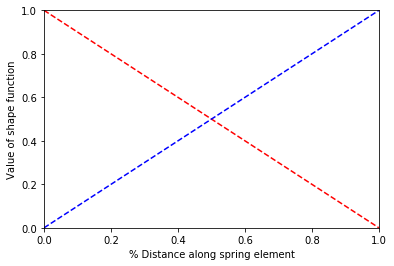

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#Define the variables:
L = 1
N_div = 10
x = np.linspace(0,L,N_div)
N1 = 1 - np.true_divide(x,L)
N2 = np.true_divide(x,L)
plt.plot(x,N1,'r--')
plt.plot(x,N2,'b--')
plt.axis([0,1,0,1])
plt.xlabel('% Distance along spring element')
plt.ylabel('Value of shape function')
plt.show()


The way to interpret this information is:
* if Node 1 were fixed ($u_1 = 0$) the displacement in the spring would be described entirely by the shape function $N_2$. Likewise, if Node 2 were fixed ($u_2 = 0$), the displacement in the spring would be described by the shape function $N_1$.
* However, for some problems $u_1$ and $u_2$ translate different distances leading to loading up of the spring.
* Example: Car suspension; say u1 represents the top of the strut tower with x positive downwards and u2 represents the bottom of the strut near the control arm. Undulations in the body and suspension will cause different displacements. Say u1 is +1.25 in. down and u2 is -1.625 in. up (maybe the car hit a bump). The shape functions are described as (for a spring that's 10 in. long):
$u(x) = \begin{bmatrix}N_1 & N_2 \end{bmatrix} \begin{bmatrix}u_1 \\ u_2 \end{bmatrix}$
$ = \begin{bmatrix}1-\frac{x}{10} & \frac{x}{10} \end{bmatrix} \begin{bmatrix}1.25 \\ -1.625 \end{bmatrix} = 1.25 - 0.2875x $
* Now if x = 0, the displacement at the strut is 1.25" as expected
* if x = 10, the displacement at the control arm is -1.625"

# Defining the Stiffness Matrix
* From Hooke's law: $F = kx$
* Freebody diagram
* If u1 and u2 are allowed to displace differently (as discussed with the strut), the force at node 1 is: $F_1 = -k(u_2 - u_1)$
* The force at node 2 is: $F_2 = k(u_2 - u_1)$
* Combine: $[F] = \begin{bmatrix}F_1 \\ F_2 \end{bmatrix} = \begin{bmatrix}k & -k \\ -k & k \end{bmatrix} \begin{bmatrix}u_1 \\ u_2 \end{bmatrix}$
* where k is stiffness matrix


In [23]:
import numpy as np

#Define variables
k = 1000
u1 = 1.25
u2 = -1.625

#Generate displacement and stiffness matrices
ke = np.array([[k, -k], [-k, k]])
un = np.array([[u1],[u2]])
#Solve for forces in at strut and control arm
F = np.matmul(ke,un)

#Check total displacement
delta = -F[0]/k #Note from matrix and element CSYS, spring is in compression
delta_check = u2-u1
print(F)
print(delta)
print(delta_check)

[[ 2875.]
 [-2875.]]
[-2.875]
-2.875


But generally, finite element analysis involves knowing something about the stiffness of the members in the design (the spring... or a bridge constructed out of beams, etc.) and we want to know the displacements. These displacements infer the internal loads of the elements which allow us to calculate stresses, etc. for the structural members. For example, if we know the weight of the car, we can approximate the static displacement of the body by inverting the stiffness matrix. The problem here though is that, in general, stiffness matrices are indeterminate and do not have an inverse (see Cramer's Rule). Therefore, we need to appropriately apply boundary conditions such that Gaussian Elimination can be used to solve the problem. Here, we assume that the body is "fixed" relative to the ground (u1 = 0) -- then the stiffness matrix can be modified as follows:

In [26]:
Wcar = 3200 #lbf
k = 1000
Ns = 4
kt = 4*k
Fc = Wcar/Ns

ke = np.array([[0, -k], [-k, 0]])
Fs = np.array([[Fc],[-Fc]])

np.linalg.solve(ke,Fs)


array([[ 0.8],
       [-0.8]])